In [201]:
# import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

import sklearn
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

import pickle as pk

In [202]:
# import dataset
df_main = pd.read_csv("E:\\Data_Analysis_Datasets\\ML\\Social_Network_Ads.csv")
df_main.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [203]:
# copy main dataframe
df = df_main.copy()

In [204]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [205]:
df.tail()

,User ID,Gender,Age,EstimatedSalary,Purchased
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0
399,15594041,Female,49,36000,1


In [206]:
df.shape

(400, 5)

In [207]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [208]:
df.isna().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [209]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [210]:
df.drop('User ID', axis=1, inplace=True)
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


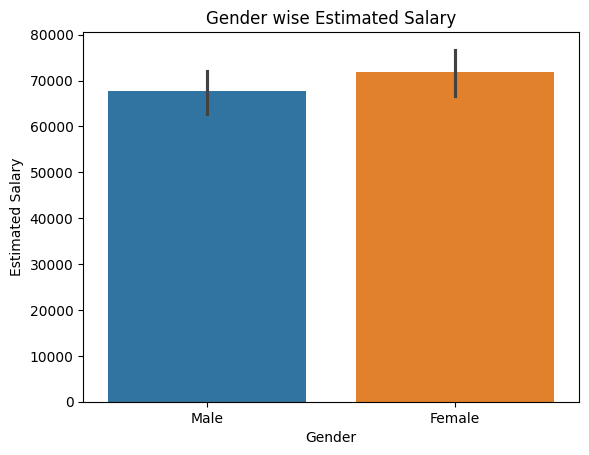

In [211]:
sns.barplot(df, x='Gender', y='EstimatedSalary', hue='Gender')
plt.title("Gender wise Estimated Salary")
plt.xlabel('Gender')
plt.ylabel('Estimated Salary')
plt.show()

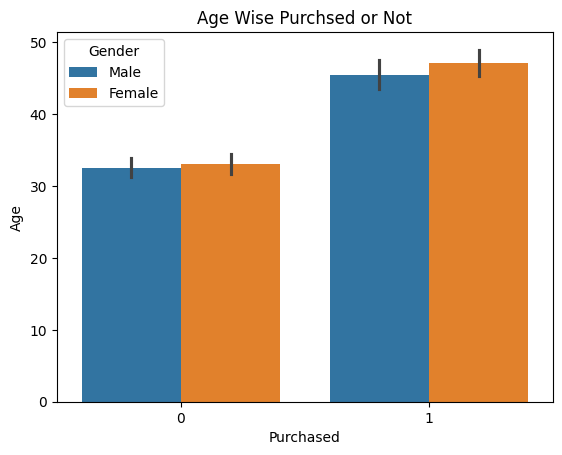

In [212]:
sns.barplot(df, x='Purchased', y='Age', hue='Gender')
plt.title("Age Wise Purchsed or Not")
plt.show()

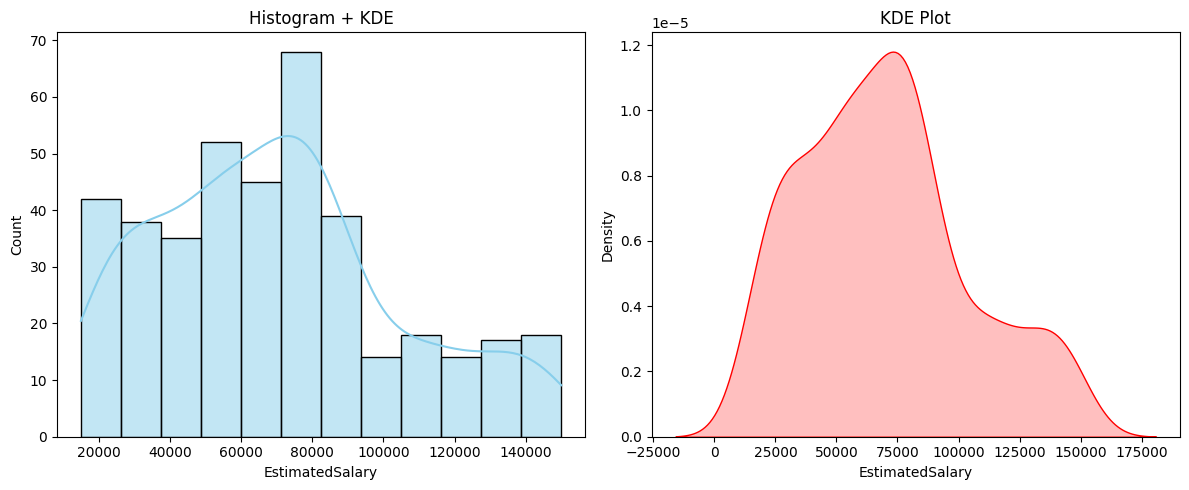

In [213]:
fig, axes = plt.subplots(1, 2, figsize=(12,5))

sns.histplot(df['EstimatedSalary'], kde=True, ax=axes[0], color="skyblue")
axes[0].set_title("Histogram + KDE")

sns.kdeplot(df['EstimatedSalary'], fill=True, ax=axes[1], color="red")
axes[1].set_title("KDE Plot")

# plt.title("Age Distribution with Histogram + KDE")
plt.tight_layout()
plt.show()


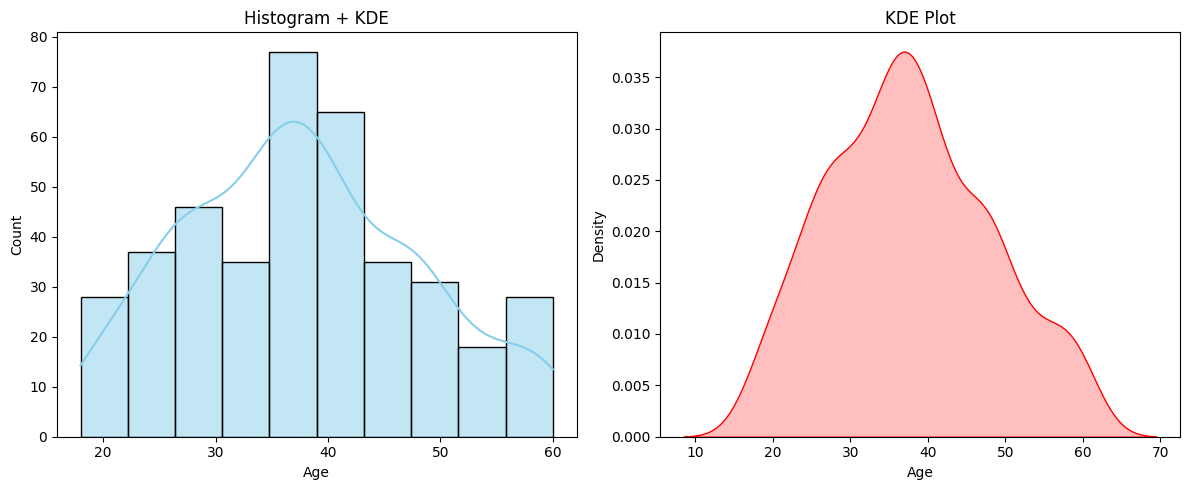

In [214]:
fig, axes = plt.subplots(1, 2, figsize=(12,5))

sns.histplot(df['Age'], kde=True, ax=axes[0], color="skyblue")

axes[0].set_title("Histogram + KDE")

sns.kdeplot(df['Age'], fill=True, ax=axes[1], color="red")
axes[1].set_title("KDE Plot")

# plt.title("Age Distribution with Histogram + KDE")
plt.tight_layout()
plt.show()


<Axes: xlabel='EstimatedSalary', ylabel='Proportion'>

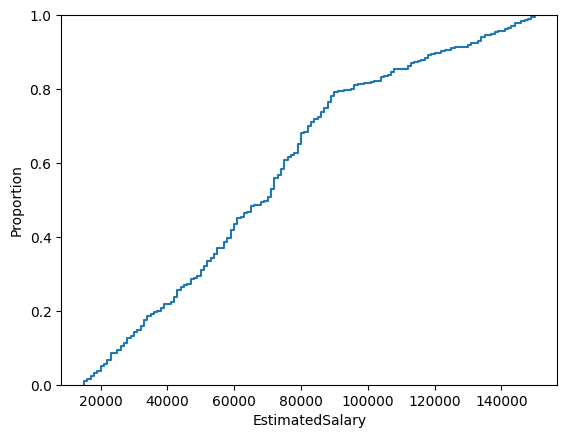

In [215]:
sns.ecdfplot(df['EstimatedSalary'])

<Axes: ylabel='Age'>

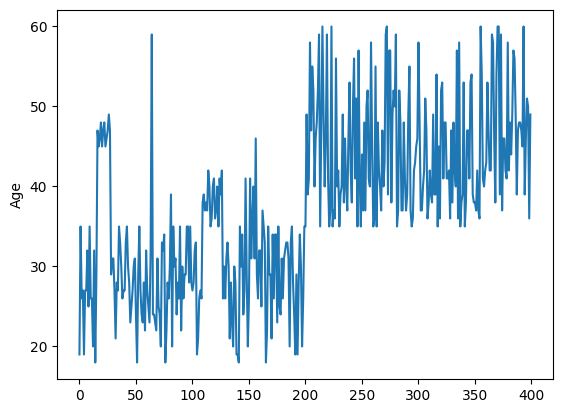

In [216]:
sns.lineplot(df['Age'])

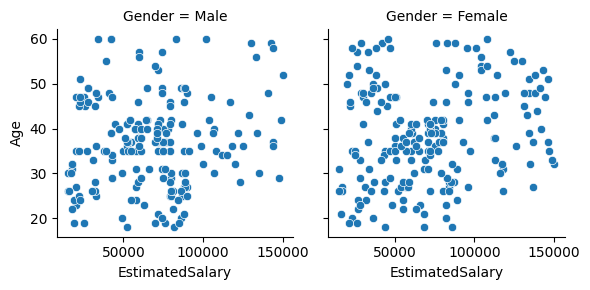

In [217]:
g = sns.FacetGrid(df, col="Gender")
g.map(sns.scatterplot, "EstimatedSalary", "Age")

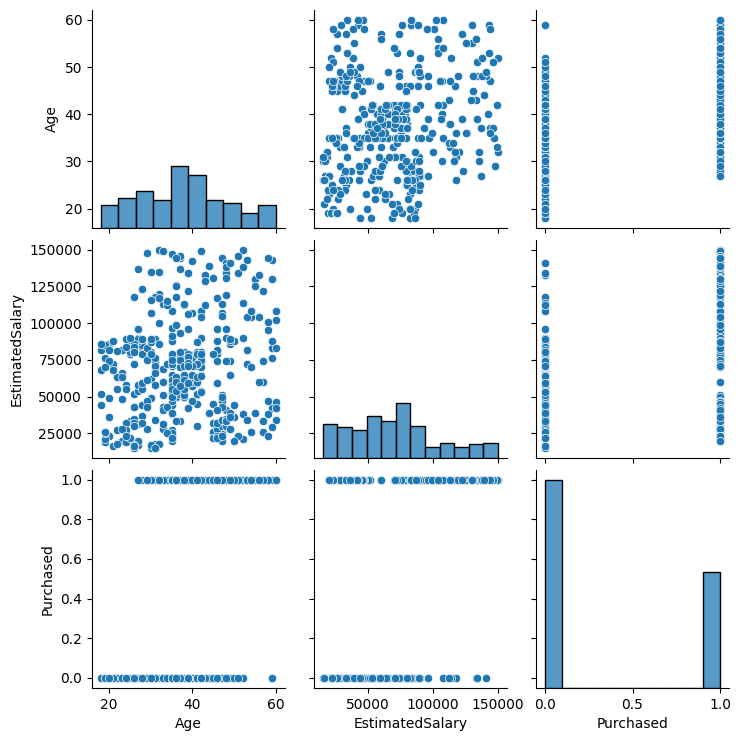

In [218]:
sns.pairplot(df)

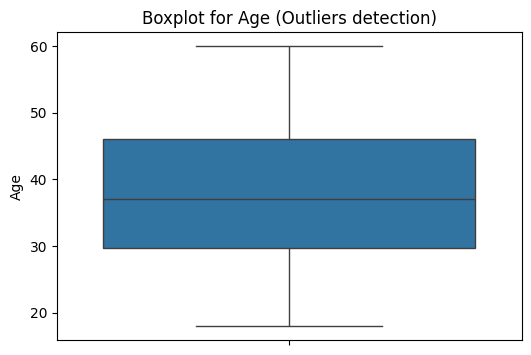

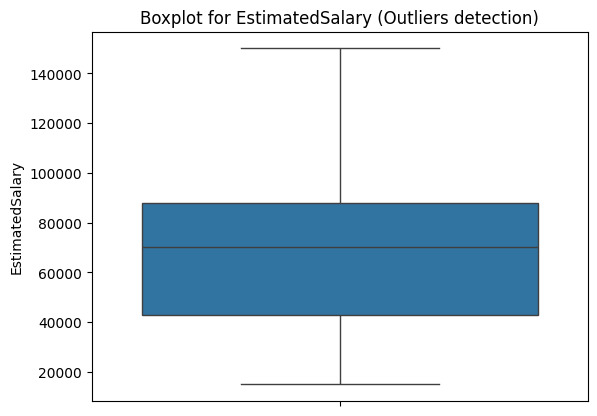

In [219]:
cols = ['Age', 'EstimatedSalary']
plt.figure(figsize=(6,4))
for i in cols:
    sns.boxplot(df[i])
    plt.title(f"Boxplot for {i} (Outliers detection)")
    plt.show()

In [220]:
# Label Encoding
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0


In [221]:
le.classes_

array(['Female', 'Male'], dtype=object)

<Axes: >

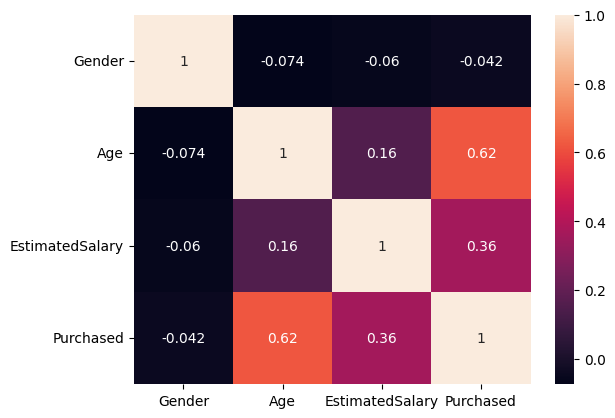

In [222]:
sns.heatmap(df.corr(), annot=True)

In [223]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [224]:
X.shape, y.shape

((400, 3), (400,))

In [225]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state=42)

In [226]:
# Pipelines for different models
pipelines = {
    "logistic": Pipeline([("scaler", StandardScaler()), ("model", LogisticRegression(max_iter=5000))]),
    "rf": Pipeline([("scaler", StandardScaler()), ("model", RandomForestClassifier())]),
    "svc": Pipeline([("scaler", StandardScaler()), ("model", SVC())]),
    "knn": Pipeline([("scaler", StandardScaler()), ("model", KNeighborsClassifier())]),
    "gb": Pipeline([("scaler", StandardScaler()), ("model", GradientBoostingClassifier())]),
}

In [227]:
# --- Hyperparameter Grid ---
params = {
    "logistic": {
        "model__penalty": ["l1", "l2", "elasticnet", "none"],
        "model__C": np.logspace(-4, 4, 10),
        "model__solver": ["lbfgs", "liblinear", "saga"],
    },
    "rf": {
        "model__n_estimators": [50, 100, 200],
        "model__max_depth": [None, 5, 10],
    },
    "svc": {
        "model__C": [0.1, 1, 10],
        "model__kernel": ["linear", "rbf"],
    },
    "knn": {
        "model__n_neighbors": [3, 5, 7],
        "model__weights": ["uniform", "distance"],
    },
    "gb": {
        "model__n_estimators": [50, 100],
        "model__learning_rate": [0.01, 0.1],
    },
}

In [228]:
best_models = {}

# Run GridSearchCV for each model
for name, pipe in pipelines.items():
    print(f"🔍 Training {name}...")
    grid = GridSearchCV(pipe, params[name], cv=5, scoring="accuracy", n_jobs=-1, verbose=1)
    grid.fit(X_train, y_train)
    print(f"✅ Best {name} params: {grid.best_params_}")
    print(f"✅ Best {name} score: {grid.best_score_:.4f}")
    best_models[name] = grid.best_estimator_
    print(" ")
    print("=======================================")
    print(" ")

# for name, pipe in pipelines.items():
#     grid = GridSearchCV(pipe, params[name], cv=5, scoring="accuracy", n_jobs=-1, verbose=1)
#     grid.fit(X_train, y_train)
#     best_models[name] = grid.best_estimator_


🔍 Training logistic...
Fitting 5 folds for each of 120 candidates, totalling 600 fits
✅ Best logistic params: {'model__C': np.float64(0.3593813663804626), 'model__penalty': 'l1', 'model__solver': 'liblinear'}
✅ Best logistic score: 0.8313
 
 
🔍 Training rf...
Fitting 5 folds for each of 9 candidates, totalling 45 fits
✅ Best rf params: {'model__max_depth': 5, 'model__n_estimators': 50}
✅ Best rf score: 0.9031
 
 
🔍 Training svc...
Fitting 5 folds for each of 6 candidates, totalling 30 fits
✅ Best svc params: {'model__C': 10, 'model__kernel': 'rbf'}
✅ Best svc score: 0.9156
 
 
🔍 Training knn...
Fitting 5 folds for each of 6 candidates, totalling 30 fits
✅ Best knn params: {'model__n_neighbors': 7, 'model__weights': 'uniform'}
✅ Best knn score: 0.9094
 
 
🔍 Training gb...
Fitting 5 folds for each of 4 candidates, totalling 20 fits
✅ Best gb params: {'model__learning_rate': 0.01, 'model__n_estimators': 100}
✅ Best gb score: 0.9062
 
 


In [229]:
# Pick best model (highest CV score)
best_model_name = max(best_models, key=lambda k: best_models[k].score(X_test, y_test))
best_model = best_models[best_model_name]

In [230]:
print(best_model_name)
print(" ")
print(best_model)

rf
 
Pipeline(steps=[('scaler', StandardScaler()),
                ('model',
                 RandomForestClassifier(max_depth=5, n_estimators=50))])


In [231]:
# Evaluate best model
y_pred = best_model.predict(X_test)

print("✅ Final Best Model Performance")
print(f"🎯 Best Model: {best_model_name}")
print(f"Test Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))


✅ Final Best Model Performance
🎯 Best Model: rf
Test Accuracy: 0.9250
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94        52
           1       0.89      0.89      0.89        28

    accuracy                           0.93        80
   macro avg       0.92      0.92      0.92        80
weighted avg       0.93      0.93      0.93        80



In [232]:
# Example input
input_data = pd.DataFrame([[0, 35, 172000]], columns=['Gender', 'Age', 'EstimatedSalary'])

# Predict with best model (could be SVM, Logistic, etc.)
prediction = best_model.predict(input_data)
print(f"Prediction: {prediction[0]}")


Prediction: 1


In [233]:
with open("pickle_multiple_model.pkl", "wb") as f:
    pk.dump(best_model, f)

In [234]:

# print(f"🎯 Best Model: {best_model_name}")
# print(f"Test Accuracy: {best_model.score(X_test, y_test):.4f}")

# # Save best model
# import pickle
# with open("pickle_multiple_model.pkl", "wb") as f:
#     pickle.dump(best_model, f)

In [235]:
# stacking or voating use and check output 